In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# to bypass warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "/home/dcti-02-11/projects/data/NYC_Taxi_Trips/data/2020_taxi_trips.csv"

trips_2020 = pd.read_csv(file_path)

In [3]:
trips_2020.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2020-01-01 06:47:28.000,2020-01-01 06:52:54.000,N,1.0,74,75,1.0,1.47,6.5,0.0,0.5,0.0,0.0,0.3,7.3,2.0,1.0,0.0
1,2.0,2020-01-01 13:25:34.000,2020-01-01 13:30:43.000,N,1.0,74,75,1.0,1.49,6.5,0.0,0.5,0.0,0.0,0.3,7.3,2.0,1.0,0.0
2,2.0,2020-01-01 14:20:35.000,2020-01-01 14:26:25.000,N,1.0,74,75,1.0,1.31,6.5,0.0,0.5,0.0,0.0,0.3,7.3,2.0,1.0,0.0
3,2.0,2020-01-02 06:56:47.000,2020-01-02 07:03:03.000,N,1.0,74,75,1.0,1.43,6.5,0.0,0.5,0.0,0.0,0.3,7.3,2.0,1.0,0.0
4,2.0,2020-01-02 09:34:46.000,2020-01-02 09:41:02.000,N,1.0,74,75,1.0,1.10,6.5,0.0,0.5,0.0,0.0,0.3,7.3,2.0,1.0,0.0


In [4]:
trips_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734051 entries, 0 to 1734050
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        float64
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           float64
 17  trip_type              float64
 18  congestion_surcharge   float64
dtypes: float64(14), int64(2), object(3)
memory usage: 251.4+ MB


In [5]:
trips_2020 = trips_2020.dropna()

## Replace and convert columns to the appropriate data types

In [6]:
# convert passenger count from float to int
list_convert = ['VendorID','RatecodeID','payment_type','trip_type','passenger_count']
trips_2020[list_convert] = trips_2020[list_convert].astype(int)

In [7]:
# Replace Y and N with True and False respectively
trips_2020['store_and_fwd_flag'].replace({'N': False, 'Y': True}, inplace=True)

In [8]:
# convert the following columns to category
list_convert = ['VendorID','RatecodeID','payment_type','trip_type']
trips_2020[list_convert] = trips_2020[list_convert].astype('category')

In [9]:
# convert pickup and dropoff to datetime
trips_2020['lpep_pickup_datetime'] = pd.to_datetime(trips_2020['lpep_pickup_datetime'])
trips_2020['lpep_dropoff_datetime'] = pd.to_datetime(trips_2020['lpep_dropoff_datetime'])

## Adding new Columns

In [10]:
# convert distance from miles to km
trips_2020['trip_distance_km'] = trips_2020['trip_distance'] * 1.609344

In [11]:
# get time difference from dropoff and pickup
trips_2020['time_diff'] = trips_2020['lpep_dropoff_datetime'] - trips_2020['lpep_pickup_datetime']

# Make the changes permanent by modifying the data type of 'time_diff' column to timedelta
trips_2020['time_diff'] = pd.to_timedelta(trips_2020['time_diff'], errors='coerce')

In [12]:
# get the pickup and dropoffs dates only
trips_2020['pickup_date'] = pd.to_datetime(trips_2020['lpep_pickup_datetime'].dt.date)
trips_2020['dropoff_date'] = pd.to_datetime(trips_2020['lpep_dropoff_datetime'].dt.date)

In [13]:
# add columns for month of the year
trips_2020['pickup_month'] = trips_2020['pickup_date'].dt.month
trips_2020['dropoff_month'] = trips_2020['dropoff_date'].dt.month

In [14]:
# add columns for day of the week
trips_2020['pickup_day'] = trips_2020['pickup_date'].dt.day_name()
trips_2020['dropoff_day'] = trips_2020['dropoff_date'].dt.day_name()

In [15]:
# Extract the hours, minutes, and seconds from the timedelta column
trips_2020['Hours'] = trips_2020['time_diff'].dt.components.hours
trips_2020['Minutes'] = trips_2020['time_diff'].dt.components.minutes
trips_2020['Seconds'] = trips_2020['time_diff'].dt.components.seconds

# Create a new column with the time as a string (hh:mm:ss format)
trips_2020['TimeOnly'] = trips_2020.apply(lambda row: f"{row['Hours']:02}:{row['Minutes']:02}:{row['Seconds']:02}", axis=1)

## Remove negative distances and negative days

In [16]:
# remove rows with trip distance less that 0
# trips_2020 = trips_2020[trips_2020['trip_distance_km'] > 0]
trips_2020.drop(trips_2020[trips_2020['trip_distance_km'] <= 0].index, inplace=True)

In [17]:
# remove rows with total amount less that 0
# trips_2020 = trips_2020[trips_2020['total_amount'] > 0]
trips_2020.drop(trips_2020[trips_2020['total_amount'] < 0].index, inplace=True)

In [18]:
# remove negative time difference
# trips_2020 = trips_2020[trips_2020['time_diff'] > pd.Timedelta(0)]
trips_2020.drop(trips_2020[trips_2020['time_diff'] < pd.Timedelta(0)].index, inplace=True)

In [19]:
count_positive = (trips_2020['trip_distance_km'] < 0).sum()
print(count_positive)

0


## Handling Outliers

In [20]:
def remove_outliers(data, column_name, lower_bound_multiplier=1.5, upper_bound_multiplier=1.5):
    """
    Remove outliers in a numeric column using the Interquartile Range (IQR) method.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to analyze for outliers.
        lower_bound_multiplier (float): The multiplier to determine the lower bound for outlier detection.
        upper_bound_multiplier (float): The multiplier to determine the upper bound for outlier detection.

    Returns:
        DataFrame: A cleaned DataFrame with outlier rows removed.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1 - lower_bound_multiplier * IQR
    upper_bound = Q3 + upper_bound_multiplier * IQR

    # Remove rows with outliers in the specified column
    # cleaned_data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    data.drop(data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)].index, inplace=True)


    return data



In [21]:
# Call the function to remove outliers in the 'trip_distance' column
# Print the shape of the cleaned DataFrame to see the difference in rows
print("Original data shape:", trips_2020.shape)
cleaned_data1 = remove_outliers(trips_2020, 'trip_distance_km')
print("Cleaned data shape:", cleaned_data1.shape)

Original data shape: (1143606, 31)
Cleaned data shape: (1040389, 31)


In [22]:
# remove outliers from the total amount
print("Original data shape:", cleaned_data1.shape)
cleaned_data2 = remove_outliers(cleaned_data1, 'total_amount')
print("Cleaned data shape:", cleaned_data2.shape)

Original data shape: (1040389, 31)
Cleaned data shape: (1008969, 31)


In [23]:
# remove outliers from the time difference
print("Original data shape:", cleaned_data2.shape)
cleaned_data3 = remove_outliers(cleaned_data2, 'time_diff')
print("Cleaned data shape:", cleaned_data3.shape)

Original data shape: (1008969, 31)
Cleaned data shape: (980351, 31)


In [24]:
cleaned_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980351 entries, 0 to 1730037
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   VendorID               980351 non-null  category       
 1   lpep_pickup_datetime   980351 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  980351 non-null  datetime64[ns] 
 3   store_and_fwd_flag     980351 non-null  bool           
 4   RatecodeID             980351 non-null  category       
 5   PULocationID           980351 non-null  int64          
 6   DOLocationID           980351 non-null  int64          
 7   passenger_count        980351 non-null  int64          
 8   trip_distance          980351 non-null  float64        
 9   fare_amount            980351 non-null  float64        
 10  extra                  980351 non-null  float64        
 11  mta_tax                980351 non-null  float64        
 12  tip_amount             980351

In [25]:
cleaned_data3.to_csv("/home/dcti-02-11/projects/data/NYC_Taxi_Trips/data/clean_trips_2020.csv", index=False)

In [26]:
df = cleaned_data3

In [27]:
# 1. Trip Duration: What is the average duration of taxi trips based on the pickup and drop-off timestamps?
df['trip_duration_minutes'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
average_duration = df['trip_duration_minutes'].mean()
print(f"Average trip duration (minutes): {average_duration:.2f}")

Average trip duration (minutes): 9.99


In [28]:
# 2. Store and Forward Flag: How many trips had the "store_and_fwd_flag" set to true? 
#    Is there any correlation between this flag and trip duration or distance?
store_fwd_trips = df[df['store_and_fwd_flag'] == True]
print(f"Number of trips with store_and_fwd_flag = True: {len(store_fwd_trips)}")

Number of trips with store_and_fwd_flag = True: 3246


In [29]:
# 3. Ratecode Analysis: What are the distribution and frequencies of different rate codes? 
#    Are there any rate codes that are more commonly used?
ratecode_counts = df['RatecodeID'].value_counts()
print("Distribution of Rate Codes:")
print(ratecode_counts)

Distribution of Rate Codes:
1     963831
5      16340
3        108
4         62
2          5
6          5
99         0
Name: RatecodeID, dtype: int64


In [30]:
# 4. Passenger Count: What is the average passenger count per trip? 
#    Are there any correlations between passenger count and trip distance or fare amount?
average_passenger_count = df['passenger_count'].mean()
correlation_passenger_distance = df['passenger_count'].corr(df['trip_distance'])
correlation_passenger_fare = df['passenger_count'].corr(df['fare_amount'])

print(f"Average passenger count per trip: {average_passenger_count:.2f}")
print(f"Correlation between passenger count and trip distance: {correlation_passenger_distance:.2f}")
print(f"Correlation between passenger count and fare amount: {correlation_passenger_fare:.2f}")

Average passenger count per trip: 1.30
Correlation between passenger count and trip distance: -0.01
Correlation between passenger count and fare amount: -0.00


Average passenger count per trip: 1.30
Correlation between passenger count and trip distance: -0.01
Correlation between passenger count and fare amount: -0.00


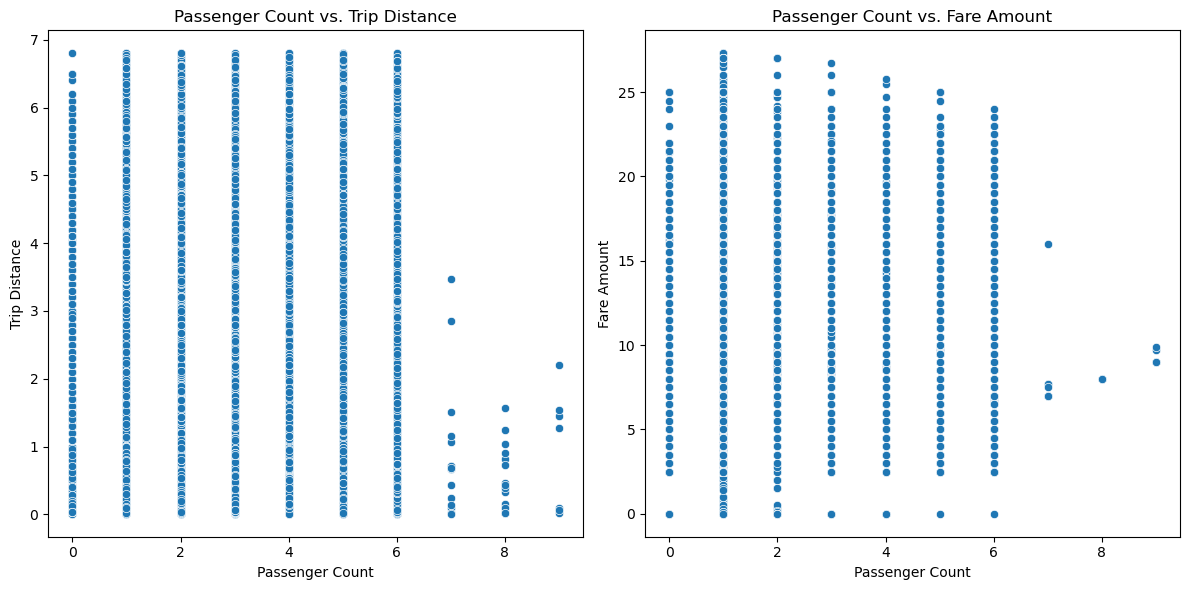

In [31]:
# Calculate the average passenger count per trip
average_passenger_count = df['passenger_count'].mean()

# Calculate the correlation between passenger count and trip distance
correlation_passenger_distance = df['passenger_count'].corr(df['trip_distance'])

# Calculate the correlation between passenger count and fare amount
correlation_passenger_fare = df['passenger_count'].corr(df['fare_amount'])

# Print the results
print(f"Average passenger count per trip: {average_passenger_count:.2f}")
print(f"Correlation between passenger count and trip distance: {correlation_passenger_distance:.2f}")
print(f"Correlation between passenger count and fare amount: {correlation_passenger_fare:.2f}")

# Create scatter plots
plt.figure(figsize=(12, 6))

# Scatter plot between passenger count and trip distance
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='passenger_count', y='trip_distance')
plt.title('Passenger Count vs. Trip Distance')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Distance')

# Scatter plot between passenger count and fare amount
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='passenger_count', y='fare_amount')
plt.title('Passenger Count vs. Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')

plt.tight_layout()
plt.show()

1. Average passenger count per trip: The average passenger count per trip is approximately 1.30. This means that, on average, there are around 1.30 passengers in each trip.

2. Correlation between passenger count and trip distance: The correlation between passenger count and trip distance is approximately -0.01. This correlation is very close to zero, indicating that there is almost no linear relationship between passenger count and trip distance. In other words, the number of passengers does not significantly impact the trip distance.

3. Correlation between passenger count and fare amount: The correlation between passenger count and fare amount is approximately -0.00. Similar to the correlation with trip distance, this value is very close to zero, suggesting that there is almost no linear relationship between the number of passengers and the fare amount. In other words, the number of passengers does not significantly impact the fare amount.

Overall, the results show that there is no strong linear relationship between the number of passengers and either the trip distance or the fare amount. The small correlation coefficients near zero indicate that passenger count does not have a substantial impact on trip distance or fare amount in this dataset.

Average trip distance: 3.08


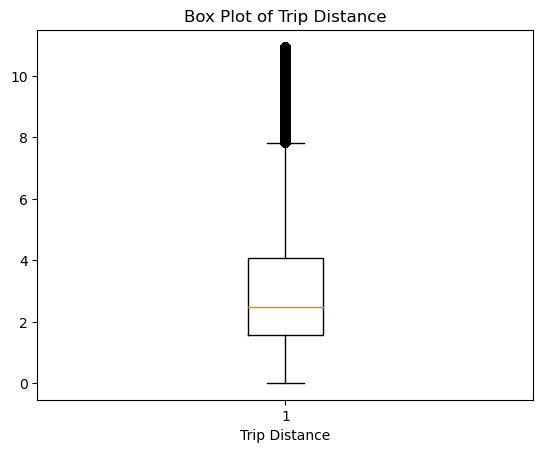

In [32]:
# 5. Trip Distance: What is the average trip distance covered by taxis? 
#    Can you identify any outliers or unusually long or short trips?
average_trip_distance = df['trip_distance_km'].mean()
print(f"Average trip distance: {average_trip_distance:.2f}")

# Box plot to identify outliers in trip distance
plt.boxplot(df['trip_distance_km'])
plt.xlabel('Trip Distance')
plt.title('Box Plot of Trip Distance')
plt.show()

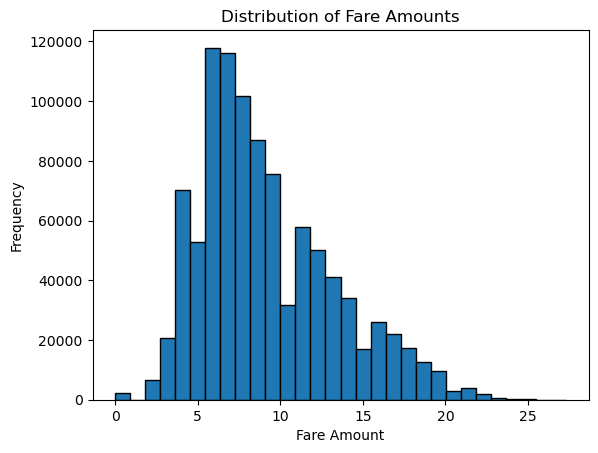

In [33]:
# 6. Fare Analysis: What is the distribution of fare amounts? 
#    Are there any factors such as distance or time that significantly influence fare amounts?
plt.hist(df['fare_amount'], bins=30, edgecolor='black')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amounts')
plt.show()

In [34]:
# 7. Extra Charges: How often and in what circumstances are extra charges applied? 
#    Is there any correlation between extra charges and total fare amounts?
extra_charges_counts = df['extra'].value_counts()
print("Frequency of Extra Charges:")
print(extra_charges_counts)

correlation_extra_fare = df['extra'].corr(df['total_amount'])
print(f"Correlation between extra charges and total fare amount: {correlation_extra_fare:.2f}")

Frequency of Extra Charges:
0.00    524904
0.50    226745
1.00    205808
2.75     12946
3.75      5475
3.25      4473
Name: extra, dtype: int64
Correlation between extra charges and total fare amount: 0.18


Correlation between extra charges and total fare amount: The correlation between the 'extra' charges and the 'total_amount' of the trip is approximately 0.18. This correlation coefficient indicates a positive correlation between extra charges and total fare amounts. A correlation of 0.18 suggests a relatively weak positive linear relationship between the two variables.

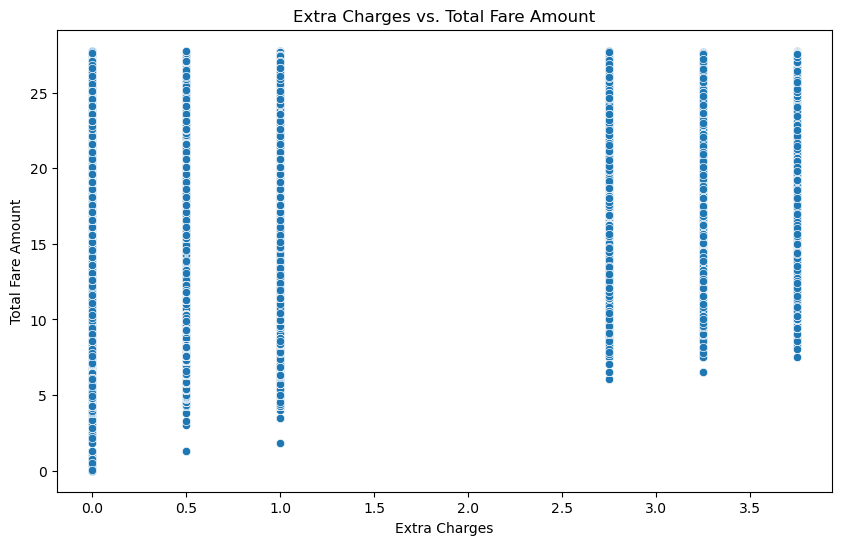

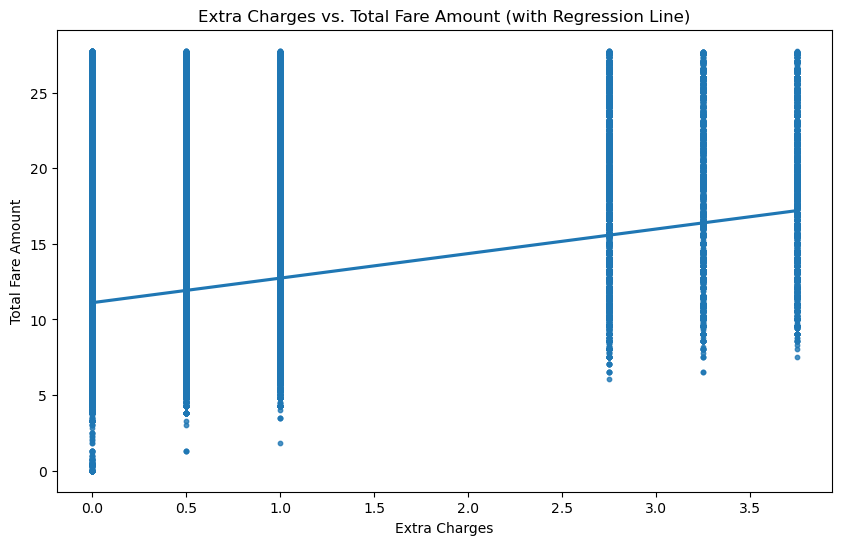

In [35]:
# Scatter plot between extra charges and total fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='extra', y='total_amount')
plt.title('Extra Charges vs. Total Fare Amount')
plt.xlabel('Extra Charges')
plt.ylabel('Total Fare Amount')
plt.show()

# Regression plot between extra charges and total fare amount
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='extra', y='total_amount', scatter_kws={'s': 10})
plt.title('Extra Charges vs. Total Fare Amount (with Regression Line)')
plt.xlabel('Extra Charges')
plt.ylabel('Total Fare Amount')
plt.show()

In [36]:
# 8. Tip Amount: What is the average tip amount given by passengers? 
#    Can you identify any patterns or trends in tipping behavior?
average_tip_amount = df['tip_amount'].mean()
print(f"Average tip amount: {average_tip_amount:.2f}")

Average tip amount: 0.99


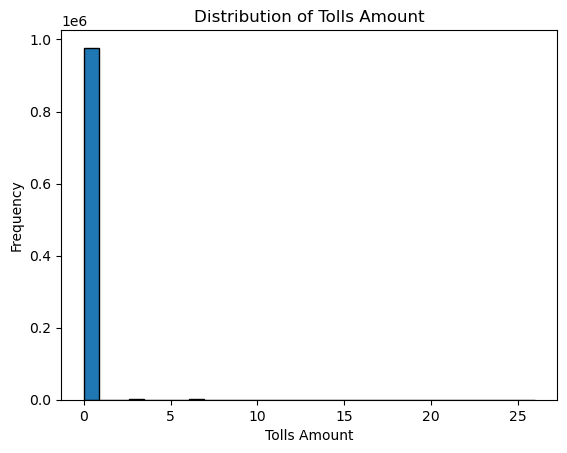

In [37]:
# 9. Tolls and Congestion Charges: What is the frequency and distribution of tolls and congestion charges incurred during trips? 
#    Are there specific locations or times when these charges are more common?
plt.hist(df['tolls_amount'], bins=30, edgecolor='black')
plt.xlabel('Tolls Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Tolls Amount')
plt.show()

In [38]:
# 10. Payment Types: What are the most common payment types used by passengers? 
#     Is there any correlation between payment type and tip amount or total fare amount?
payment_type_counts = df['payment_type'].value_counts()
print("Frequency of Payment Types:")
print(payment_type_counts)

correlation_payment_tip = df['payment_type'].corr(df['tip_amount'])
correlation_payment_fare = df['payment_type'].corr(df['total_amount'])
print(f"Correlation between payment type and tip amount: {correlation_payment_tip:.2f}")
print(f"Correlation between payment type and total fare amount: {correlation_payment_fare:.2f}")

Frequency of Payment Types:
1    505657
2    470462
3      3203
4       998
5        31
Name: payment_type, dtype: int64
Correlation between payment type and tip amount: -0.71
Correlation between payment type and total fare amount: -0.30


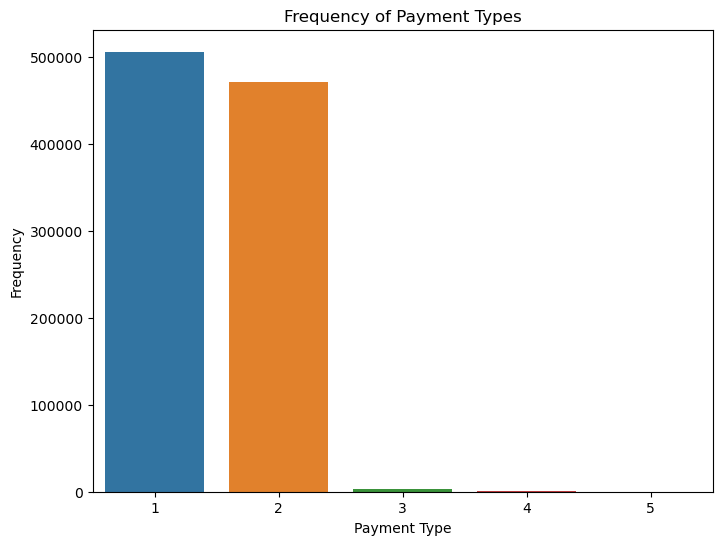

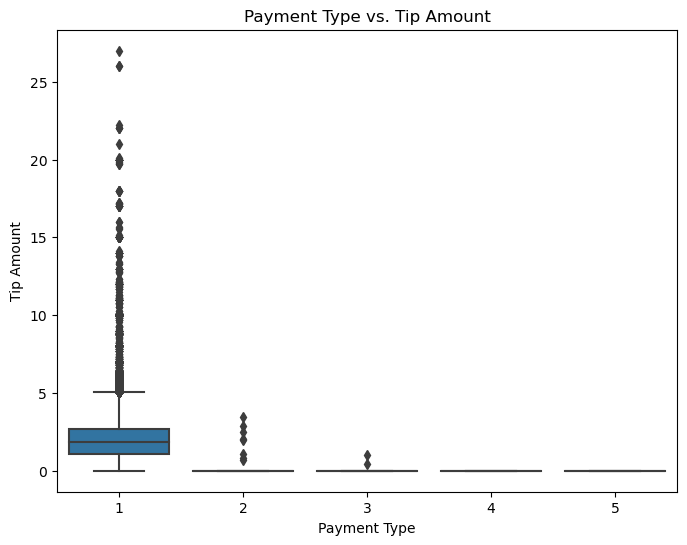

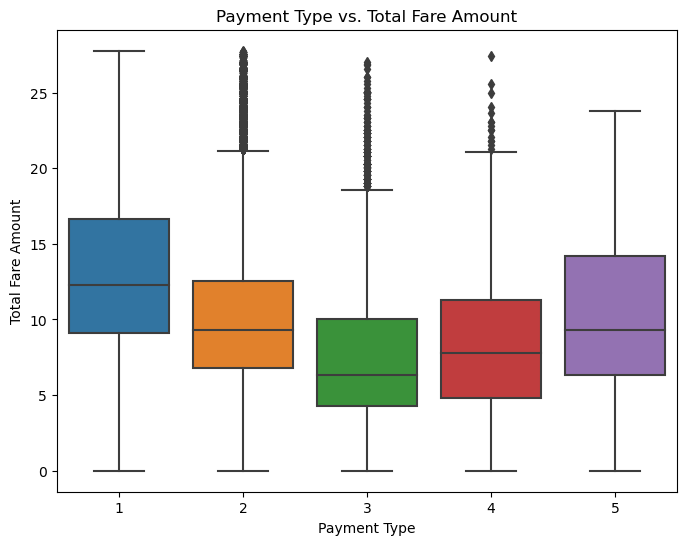

In [39]:

# Frequency of Payment Types - Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='payment_type')
plt.title('Frequency of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.show()

# Correlation between payment type and tip amount - Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='payment_type', y='tip_amount')
plt.title('Payment Type vs. Tip Amount')
plt.xlabel('Payment Type')
plt.ylabel('Tip Amount')
plt.show()

# Correlation between payment type and total fare amount - Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='payment_type', y='total_amount')
plt.title('Payment Type vs. Total Fare Amount')
plt.xlabel('Payment Type')
plt.ylabel('Total Fare Amount')
plt.show()


Correlation between payment type and tip amount: The correlation between the 'payment_type' and 'tip_amount' columns is approximately -0.71. This strong negative correlation suggests that passengers who use certain payment types tend to give lower tips, while passengers who use other payment types tend to give higher tips.

Correlation between payment type and total fare amount: The correlation between the 'payment_type' and 'total_amount' columns is approximately -0.30. This negative correlation indicates that the choice of payment method has a moderate effect on the total fare amount. Certain payment types may be associated with higher or lower total fare amounts compared to others.

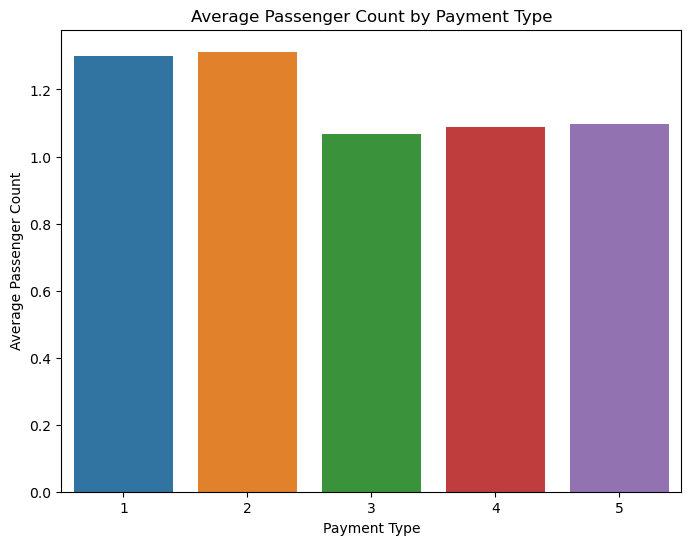

In [40]:
# Calculate the average passenger count for each payment type
average_passenger_count_by_payment = df.groupby('payment_type')['passenger_count'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=average_passenger_count_by_payment.index, y=average_passenger_count_by_payment.values)
plt.title('Average Passenger Count by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Passenger Count')
plt.show()

In [41]:
# 11. Trip Types: What is the distribution of trip types (e.g., street-hail, dispatch) in the dataset? 
#     Are there any differences in trip duration or fare amounts based on trip type?
trip_type_counts = df['trip_type'].value_counts()
print("Frequency of Trip Types:")
print(trip_type_counts)

Frequency of Trip Types:
1    964447
2     15904
Name: trip_type, dtype: int64


In [42]:
def analyze_pickup_dropoff_clusters(df, n_clusters=5, top=True):
    # Calculate the demand for pickup and drop-off locations
    pickup_demand = df['PULocationID'].value_counts()
    dropoff_demand = df['DOLocationID'].value_counts()

    # Determine the indexing method based on 'top' parameter
    if top:
        pickup_demand = pickup_demand.head(10)
        dropoff_demand = dropoff_demand.head(10)
    else:
        pickup_demand = pickup_demand.tail(10)
        dropoff_demand = dropoff_demand.tail(10)

    # Visualize the pickup and drop-off locations with the highest demand
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=pickup_demand.index, y=pickup_demand.values, color='grey')
    plt.title('Top 10 Pickup Locations with Highest Demand' if top else 'Bottom 10 Pickup Locations with Lowest Demand')
    plt.xlabel('PULocationID')
    plt.ylabel('Demand Count')

    plt.subplot(1, 2, 2)
    sns.barplot(x=dropoff_demand.index, y=dropoff_demand.values, color='grey')
    plt.title('Top 10 Drop-off Locations with Highest Demand' if top else 'Bottom 10 Drop-off Locations with Lowest Demand')
    plt.xlabel('DOLocationID')
    plt.ylabel('Demand Count')

    plt.tight_layout()
    plt.show()

    # Extract relevant columns for clustering
    locations_df = df[['PULocationID', 'DOLocationID']]

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(locations_df)

    # Add cluster labels to the DataFrame
    locations_df['Cluster'] = kmeans.labels_

    # Get cluster centers
    cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['PULocationID', 'DOLocationID'])

    # Sort clusters based on the mean of PULocationID
    sorted_cluster_labels = cluster_centers.mean(axis=1).sort_values().index
    locations_df['Cluster'] = locations_df['Cluster'].map({label: i for i, label in enumerate(sorted_cluster_labels)})

    # Visualize clusters on a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PULocationID', y='DOLocationID', hue='Cluster', data=locations_df, palette='viridis', s=50, legend='full')
    plt.title('Clusters of Popular Pickup and Drop-off Locations')
    plt.xlabel('PULocationID')
    plt.ylabel('DOLocationID')
    plt.legend(title='Cluster', loc='upper left')
    plt.show()

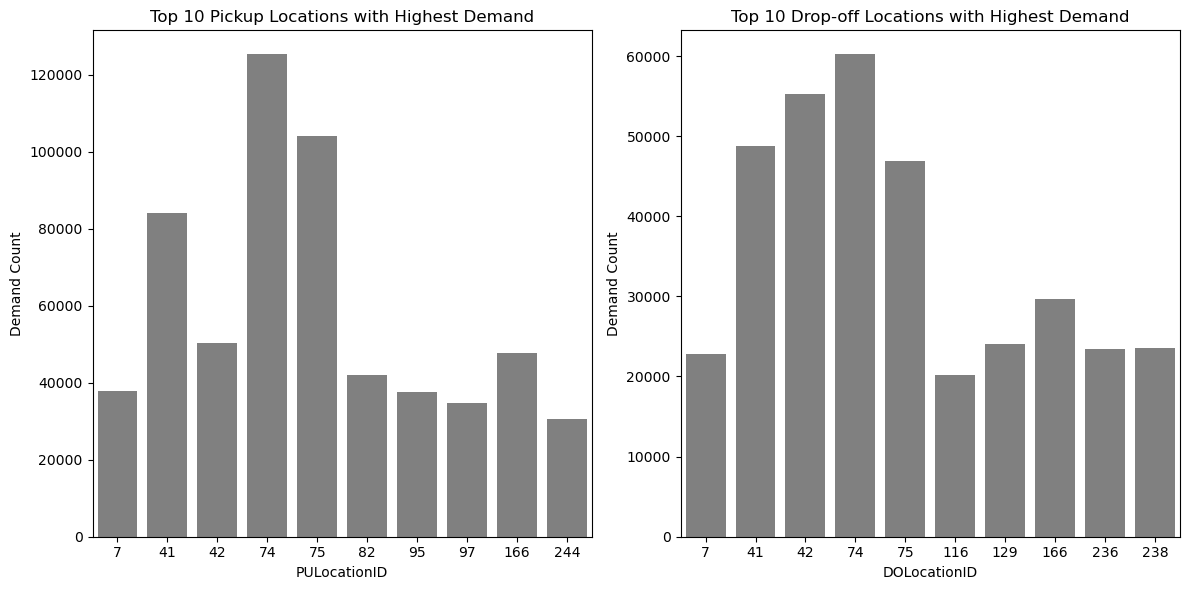

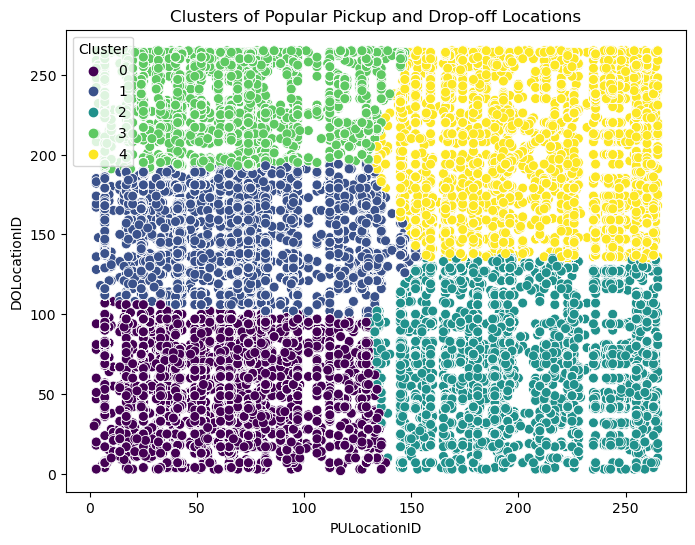

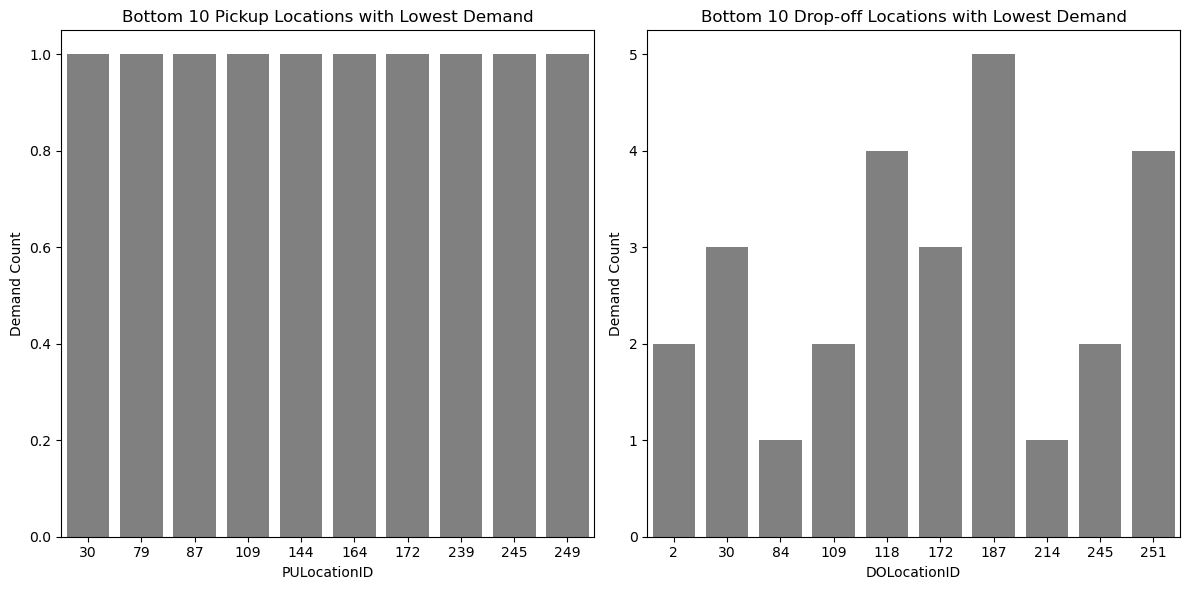

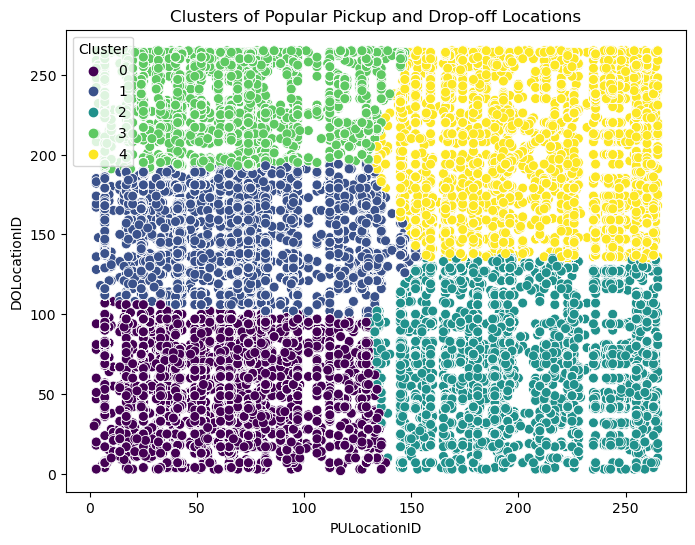

In [43]:
# Assuming 'df' is the pandas DataFrame containing the data
# Call the function with top=True for top 10, or top=False for bottom 10
analyze_pickup_dropoff_clusters(df, n_clusters=5, top=True)
analyze_pickup_dropoff_clusters(df, n_clusters=5, top=False)

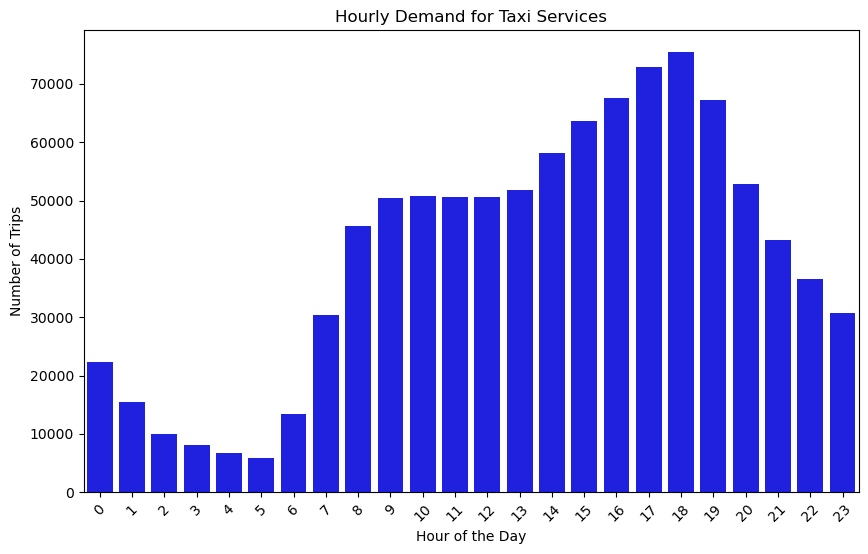

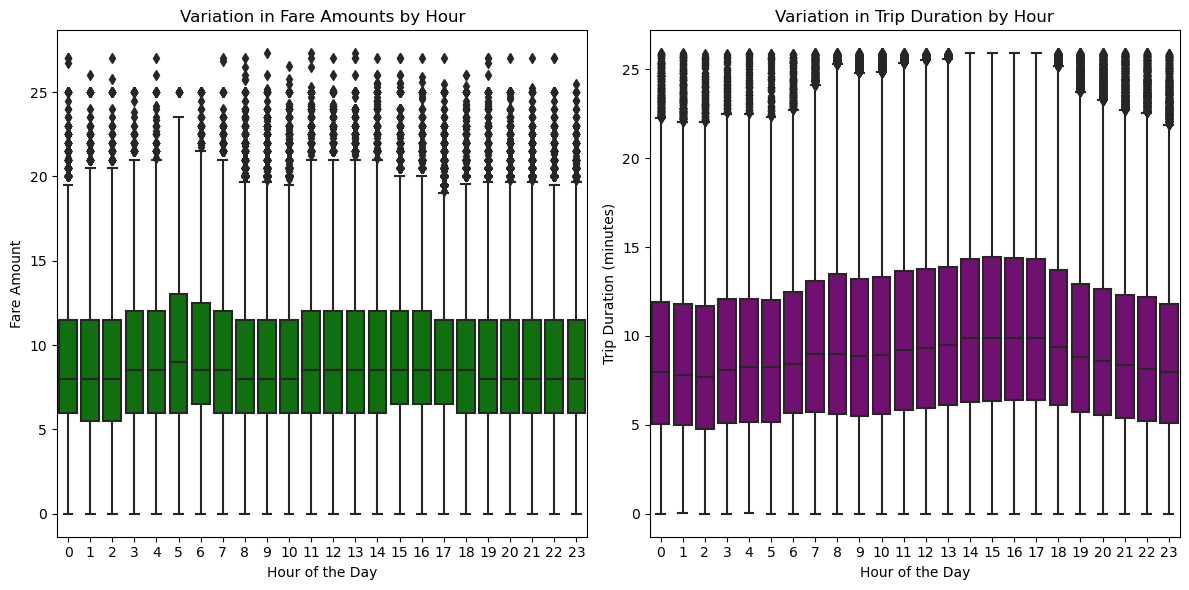

In [44]:
# Extract hour from pickup timestamp
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour

# Calculate the demand (number of trips) for each hour
hourly_demand = df['pickup_hour'].value_counts().sort_index()

# Visualize the demand based on pickup timestamps
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_demand.index, y=hourly_demand.values, color='blue')
plt.title('Hourly Demand for Taxi Services')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

# Analyze fare amounts and trip durations during different times of the day
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='pickup_hour', y='fare_amount', color='green')
plt.title('Variation in Fare Amounts by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Fare Amount')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='pickup_hour', y='trip_duration_minutes', color='purple')
plt.title('Variation in Trip Duration by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Duration (minutes)')

plt.tight_layout()
plt.show()


In [ ]:
# Extract hour from pickup timestamp
df['dropoff_hour'] = df['lpep_dropoff_datetime'].dt.hour

# Calculate the demand (number of trips) for each hour
hourly_demand = df['dropoff_hour'].value_counts().sort_index()

# Visualize the demand based on pickup timestamps
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_demand.index, y=hourly_demand.values, color='blue')
plt.title('Hourly Demand for Taxi Services')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

# Analyze fare amounts and trip durations during different times of the day
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='dropoff_hour', y='fare_amount', color='green')
plt.title('Variation in Fare Amounts by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Fare Amount')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='dropoff_hour', y='trip_duration_minutes', color='purple')
plt.title('Variation in Trip Duration by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Duration (minutes)')

plt.tight_layout()
plt.show()


In [ ]:
# 15. Vendor Analysis: What is the distribution of trips among different vendors (VendorID)? 
#     Is there any difference in trip duration, distance, or fare amounts based on the vendor?
vendor_counts = df['VendorID'].value_counts()
print("Frequency of Vendors:")
print(vendor_counts)

In [ ]:
# Analyze trip duration, distance, and fare amounts for different vendors
vendor_stats = df.groupby('VendorID')[['trip_duration_minutes', 'trip_distance', 'fare_amount']].mean()
print(vendor_stats)

In [ ]:
# Calculate mean trip duration, distance, and fare amounts for each vendor
vendor_stats = df.groupby('VendorID')[['trip_duration_minutes', 'trip_distance_km', 'fare_amount']].mean()

# Print the vendor statistics
print(vendor_stats)

# # Plot the trip statistics for different vendors
# plt.figure(figsize=(10, 6))
# sns.barplot(data=vendor_stats.reset_index(), x='VendorID', y='trip_duration_minutes', color='blue')
# plt.title('Mean Trip Duration by Vendor')
# plt.xlabel('VendorID')
# plt.ylabel('Mean Trip Duration (Minutes)')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.barplot(data=vendor_stats.reset_index(), x='VendorID', y='trip_distance', color='green')
# plt.title('Mean Trip Distance by Vendor')
# plt.xlabel('VendorID')
# plt.ylabel('Mean Trip Distance')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.barplot(data=vendor_stats.reset_index(), x='VendorID', y='fare_amount', color='purple')
# plt.title('Mean Fare Amount by Vendor')
# plt.xlabel('VendorID')
# plt.ylabel('Mean Fare Amount')
# plt.show()
